In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

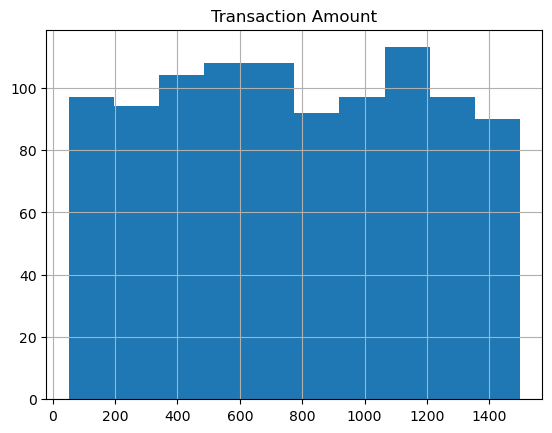

<AxesSubplot:title={'center':'Histogram of distribution of transaction amount'}, ylabel='Frequency'>

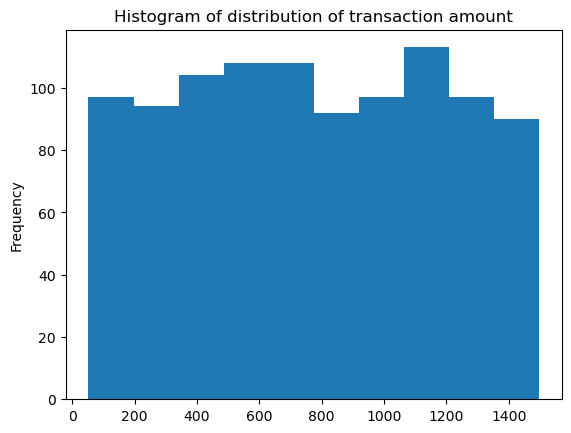

In [20]:
df = pd.read_excel('Transactiondata.xlsx')
df.hist()
plt.show()

df["Transaction Amount"].plot(kind='hist', bins = 10, title = "Histogram of distribution of transaction amount")

<AxesSubplot:>

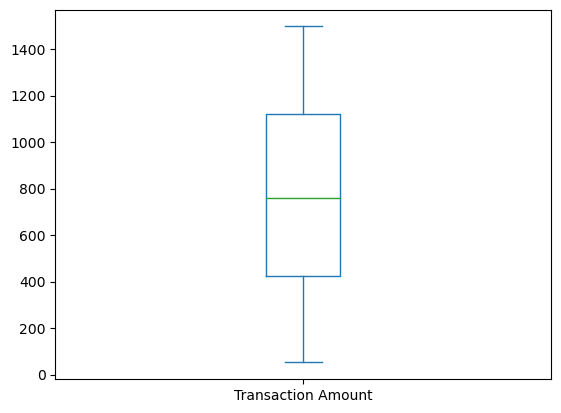

In [11]:
df["Transaction Amount"].plot(kind = 'box')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
dtypes: bool(1), float64(1), object(8)
memory usage: 71.4+ KB


In [13]:
df.describe()

,Transaction Amount
count,1000.00000
mean,771.16529
std,411.01925
min,51.89000
25%,423.34750
50%,761.65500
75%,1122.67250
max,1497.76000


In [15]:
df.shape

(1000, 10)

In [16]:
max = df["Transaction Amount"].max()
df[df["Transaction Amount"] == max]

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
240,TXN1696527060,ACC44804,ACC26269,1497.76,Transfer,1/17/2025 10:54,Success,True,"55.7558 N, -118.2437 W",Desktop


In [17]:
numeric_columns = df.select_dtypes(include = np.number).columns
summary_before = df[numeric_columns].describe().transpose()[['min', '25%', '50%', '75%', 'max']]
print(summary_before)

                      min       25%      50%        75%      max
Transaction Amount  51.89  423.3475  761.655  1122.6725  1497.76


In [18]:
df[numeric_columns] = df[numeric_columns].replace(-1, np.nan)  
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  

summary_after_missing = df[numeric_columns].describe().transpose()[['min', '25%', '50%', '75%', 'max']]
print(summary_after_missing)

                      min       25%      50%        75%      max
Transaction Amount  51.89  423.3475  761.655  1122.6725  1497.76


In [21]:
df.drop(['Geolocation (Latitude/Longitude)'],axis=1,inplace=True)
df.dropna(inplace=True,how='any')
df.describe()

,Transaction Amount
count,1000.00000
mean,771.16529
std,411.01925
min,51.89000
25%,423.34750
50%,761.65500
75%,1122.67250
max,1497.76000


In [21]:
plt.pie??